In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

store = pd.read_csv('Data/store.csv')
train_1 = pd.read_csv('Data/train_1.csv')
train_2 = pd.read_csv('Data/train_2.csv')
train = pd.concat([train_1, train_2], axis=0)
train= train.drop(columns=['Unnamed: 0'])
test = pd.read_csv('Data/test.csv')

print('store : ',store.shape)
print('train : ',train.shape)
print('test : ',test.shape)

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


store :  (1115, 10)
train :  (1017209, 9)
test :  (41088, 8)


Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. 
Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [2]:
store.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [3]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [4]:
store['StoreType'].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [5]:
train.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


### Open

In [6]:
train[train['Open'] == 0]['Sales'].sum()

0

In [7]:
train = train[train['Open'] == 1]
train= train.drop(columns=['Customers','Open'])
train.head(3)

,Store,DayOfWeek,Date,Sales,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,1,0,1
1,2,5,2015-07-31,6064,1,0,1
2,3,5,2015-07-31,8314,1,0,1


### Day of Week

In [12]:
train['DayOfWeek'].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

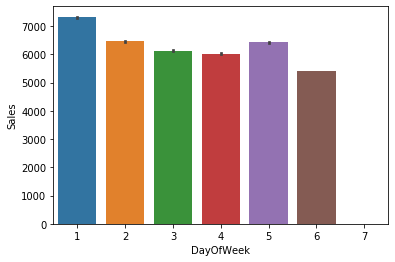

In [13]:
from numpy import median
sns.barplot(x="DayOfWeek", y="Sales", data=train, estimator = median)

In [15]:
train[['DayOfWeek','Sales']].corr()

,DayOfWeek,Sales
DayOfWeek,1.000000,-0.462125
Sales,-0.462125,1.000000


### StoreType / Assortment

In [16]:
store['StoreType'].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [17]:
store['Assortment'].value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

In [50]:
merge = train.merge(store,how='left')
#merge = merge.drop(columns = ['Date','StateHoliday','SchoolHoliday','CompetitionDistance','Promo',
                             #'CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2',
                             #'Promo2SinceWeek','Promo2SinceYear','PromoInterval'])
merge.head(3)

,Store,DayOfWeek,Date,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


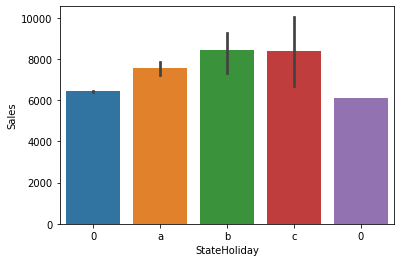

In [11]:
sns.barplot(x="StateHoliday", y="Sales", data=merge[:10], estimator = np.median)

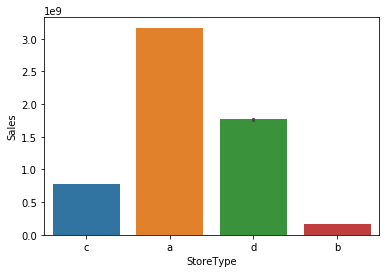

In [10]:
sns.barplot(x="StoreType", y="Sales", data=merge, estimator = sum)

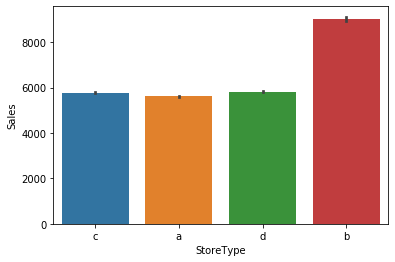

In [19]:
sns.barplot(x="StoreType", y="Sales", data=merge, estimator = np.median)

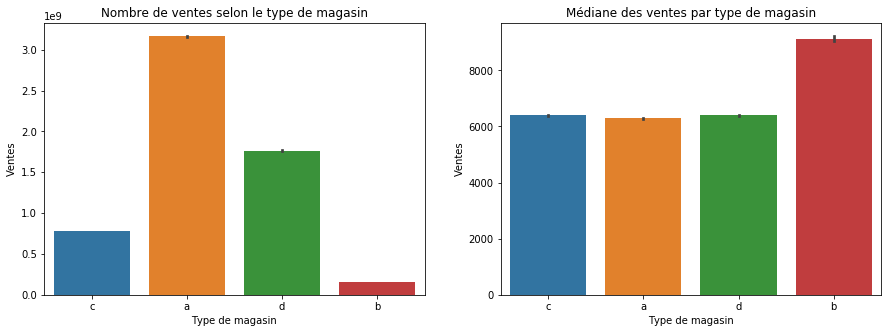

In [31]:
fig, axs = plt.subplots(figsize=(15,5), ncols=2)
sns.barplot(x="StoreType", y="Sales", data=merge, estimator = sum, ax=axs[0])
sns.barplot(x="StoreType", y="Sales", data=merge, estimator = np.median, ax=axs[1])

axs[0].set_title("Nombre de ventes selon le type de magasin")
axs[1].set_title("Médiane des ventes par type de magasin")
axs[0].set_xlabel('Type de magasin')
axs[1].set_xlabel('Type de magasin')
axs[0].set_ylabel('Ventes')
axs[1].set_ylabel('Ventes')
plt.show()

In [143]:
merge['StateHoliday'] = merge['StateHoliday'].replace({'0':'Pas de vacances',0:'Pas de vacances',
                                                     'a':'Autres', 'b':'Pâques',
                                                     'c':'Noël'})
merge['DayOfWeek'] = merge['DayOfWeek'].replace({1:'Lundi',2:'Mardi',3:'Mercredi',4:'Jeudi',5:'Vendredi',
                                                     6:'Samedi', 7:'Dimanche'})

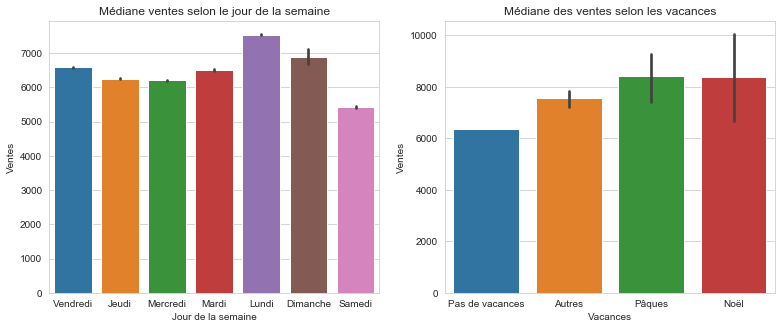

In [144]:
fig, axs = plt.subplots(figsize=(13,5), ncols=2)
sns.barplot(x="DayOfWeek", y="Sales", data=merge, estimator = np.median, ax=axs[0])
sns.barplot(x="StateHoliday", y="Sales", data=merge, estimator = np.median, ax=axs[1])

axs[0].set_title("Médiane ventes selon le jour de la semaine")
axs[1].set_title("Médiane des ventes selon les vacances")
axs[0].set_xlabel('Jour de la semaine')
axs[1].set_xlabel('Vacances')
axs[0].set_ylabel('Ventes')
axs[1].set_ylabel('Ventes')
plt.show()

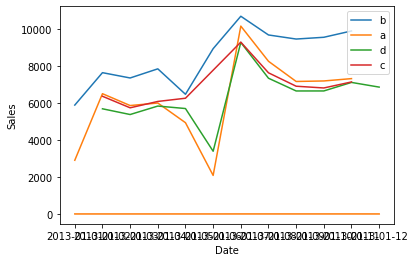

In [61]:
sns.lineplot(data=merge.sort_values(by=['Date']).iloc[:10000], x="Date", y="Sales", hue='StoreType',ci=None)
sns.lineplot(data=merge.sort_values(by=['Date']).iloc[:10000], x="Date", y="Promo")
plt.show()

In [146]:
merge['Date'] = [pd.to_datetime(date, format='%Y-%m-%d') for date in np.array(merge['Date'])]

In [98]:
merge.sort_values(by=['Date']).iloc[-110000:-10000,:]

,Store,DayOfWeek,Date,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
109273,82,Jeudi,2015-04-02,13965,1,Pas de vacances,1,a,a,22390.0,4.0,2008.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
109274,83,Jeudi,2015-04-02,5806,1,Pas de vacances,1,a,a,2710.0,NaN,NaN,0,NaN,NaN,NaN
109275,84,Jeudi,2015-04-02,18860,1,Pas de vacances,1,a,c,11810.0,8.0,2014.0,0,NaN,NaN,NaN
109269,78,Jeudi,2015-04-02,5976,1,Pas de vacances,1,a,a,3510.0,11.0,2006.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
109261,70,Jeudi,2015-04-02,9573,1,Pas de vacances,1,c,c,4840.0,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9340,406,Mercredi,2015-07-22,5679,0,Pas de vacances,0,d,c,8240.0,3.0,2001.0,1,10.0,2013.0,"Feb,May,Aug,Nov"
9339,405,Mercredi,2015-07-22,3212,0,Pas de vacances,1,a,a,1080.0,4.0,2008.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
9338,404,Mercredi,2015-07-22,4532,0,Pas de vacances,0,a,c,1420.0,NaN,NaN,1,10.0,2013.0,"Mar,Jun,Sept,Dec"
9337,403,Mercredi,2015-07-22,6258,0,Pas de vacances,1,a,a,4970.0,7.0,2015.0,0,NaN,NaN,NaN


In [156]:
merge['month'] = merge['Date'].apply(lambda x : x.month)
merge['year'] = merge['Date'].apply(lambda x : x.year)

In [163]:
merge_2015 = merge[merge['year'] == 2015]
merge_2015 = merge_2015[merge_2015['month'] > 4]

In [164]:
merge_2015['month'].value_counts()

7    30188
6    28423
5    25880
Name: month, dtype: int64

In [169]:
df.shape[0]

84491

In [170]:
df.loc[25000,'Date']

Timestamp('2015-07-06 00:00:00')

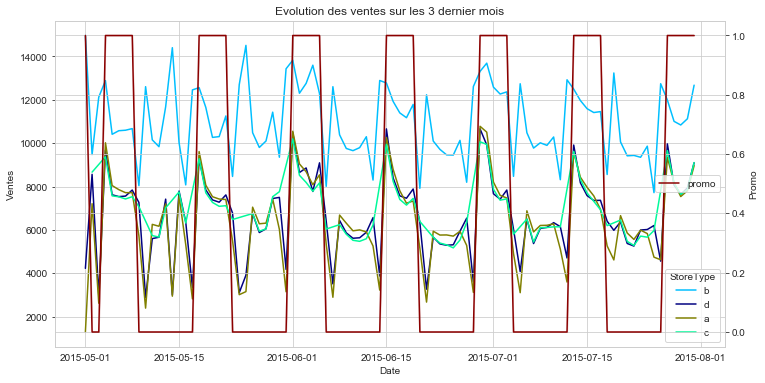

In [178]:
df = merge_2015.sort_values(by=['Date'])
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=df, x="Date", y="Sales", hue='StoreType',
             ci=None,ax=ax,palette=["deepskyblue", "navy", "olive", "mediumspringgreen"])
ax2 = ax.twinx()
sns.lineplot(data=df, x="Date", y="Promo",ax=ax2,color='darkred',legend='brief', label='promo')
ax.set_ylabel('Ventes')
#x_dates = df['Date'].dt.strftime('%Y-%m').sort_values().unique()
#ax.set_xticks(["Timestamp('2015-07-06 00:00:00')","Timestamp('2015-07-06 00:00:00')",
              #"Timestamp('2015-07-06 00:00:00')"])
#ax.set_xticklabels(labels=['Mai 2015','Juin 2015','Juillet 2015'], rotation=45, ha='right')
plt.title('Evolution des ventes sur les 3 dernier mois')
plt.show()

In [141]:
merge = train.merge(store,how='left')
L = list(merge.columns)
L.remove('Sales')
merge = merge[L+['Sales']]

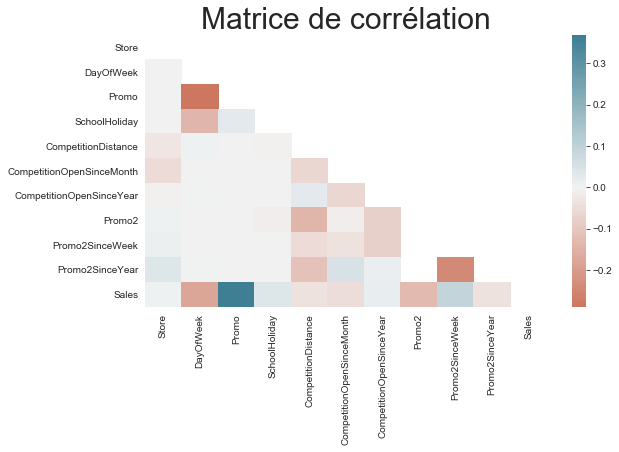

In [142]:
## Plotting heatmap. 
sns.set_style('whitegrid')
plt.subplots(figsize = (9,5))

# Generate a mask for the upper triangle 
mask = np.zeros_like(merge.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(merge.corr(), cmap=sns.diverging_palette(20, 220, n=200), mask = mask, annot=False, center = 0);
## Give title. 
plt.title("Matrice de corrélation", fontsize = 30);